In [203]:
import requests
import re 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS
import pandas as pd
import numpy as np

In [204]:
reviewlist =[]
url="https://www.amazon.in/Adidas-Mens-Adivat-Running-Shoes/product-reviews/B0BG3N5ZLT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [205]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    return soup


In [206]:
def get_review(soup):
    reviews = soup.find_all('div',{'data-hook':'review'})
    try:
        for items in reviews:
            review = {
            'ratings' : float(items.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'customer' : items.find('span',{'class':'a-profile-name'}).text.strip(),
            'Comments': items.find('span',{'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass
      
    

In [207]:
for x in range(1,10):
  soup = get_soup(f'https://www.amazon.in/Adidas-Mens-Adivat-Running-Shoes/product-reviews/B0BG3N5ZLT/ref=cm_cr_getr_d_paging_btm_prev_8?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
  get_review(soup)
  if not soup.find('li',{'class':'a-disabled a-last'}):
      pass
  else:
      break
      

In [208]:
print(len(reviewlist))

83


In [209]:
df = pd.DataFrame(reviewlist)

In [210]:
df.head()

,ratings,customer,Comments
0,3.0,suman,"Looks fine, light weight but it seems to be de..."
1,3.0,Mrugesh Priyadarshi,I don’t like this product.
2,5.0,Roy Mathew,First time I was buying an Addidas shoe from o...
3,3.0,Om Taywade,Damaged product with damaged box
4,5.0,rajveer singh thalwal,Yaa its light weight and comfort too..... Also...


In [211]:
df.isnull().sum()

ratings     0
customer    0
Comments    0
dtype: int64

In [212]:
text2 = df['Comments']

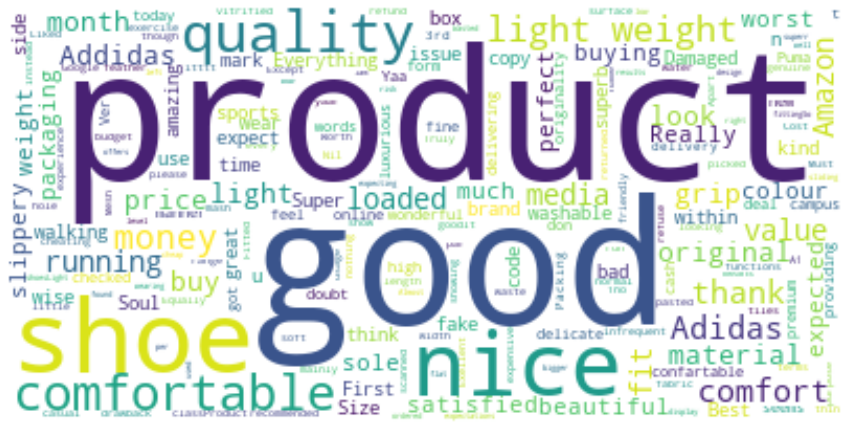

In [213]:
text = " ".join(i for i in df.Comments)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [214]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

for index , row in df['Comments'].iteritems():
  score  = SentimentIntensityAnalyzer().polarity_scores(row)

  neg = score['neg']
  pos = score['pos']
  neu = score['neu']
  if neg > pos:
    df.loc[index,'sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index,'sentiment'] = 'Positive'
  else:
    df.loc[index,'sentiment'] = 'Neutral'

In [216]:
df.head()

,ratings,customer,Comments,sentiment
0,3.0,suman,"Looks fine, light weight but it seems to be de...",Positive
1,3.0,Mrugesh Priyadarshi,I don’t like this product.,Positive
2,5.0,Roy Mathew,First time I was buying an Addidas shoe from o...,Positive
3,3.0,Om Taywade,Damaged product with damaged box,Negative
4,5.0,rajveer singh thalwal,Yaa its light weight and comfort too..... Also...,Positive


Text(0, 0.5, 'Frequency')

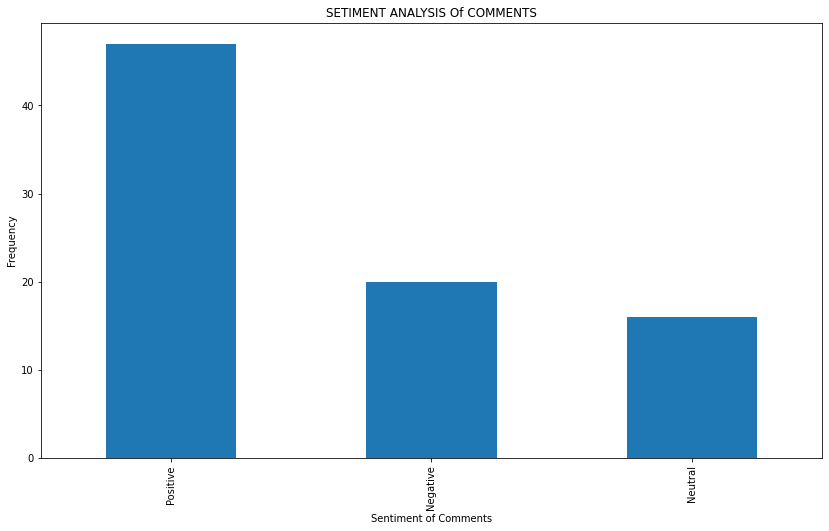

In [217]:
ax = df['sentiment'].value_counts().plot(kind='bar',figsize=(14,8),title="SETIMENT ANALYSIS Of COMMENTS")
ax.set_xlabel("Sentiment of Comments")
ax.set_ylabel("Frequency")